# Main

## Pre-processing

Features definitions:
1. obj_ID = Идентификатор объекта
2. alpha = Угол прямого восхождения
3. delta = Угол склонения
4. u = Ультрафиолетовый фильтр в фотометрической системе
5. g = Зеленый фильтр в фотометрической системе
6. r = Красный фильтр в фотометрической системе
7. i = Фильтр ближнего инфракрасного диапазона в фотометрической системе
8. z = Инфракрасный фильтр в фотометрической системе
9. run_ID = Номер запуска, используемый для идентификации конкретного сканирования
10. rereun_ID = Номер повтора, чтобы указать, как было обработано изображение.
11. cam_col = Столбец камеры для определения строки сканирования в пределах прогона
12. field_ID = Номер поля для идентификации
13. spec_obj_ID = Уникальный идентификатор, используемый для оптических спектроскопических объектов (это означает, что два разных наблюдения с одинаковым spec_obj_ID должны иметь общий выходной класс)
14. class = Класс объекта (галактика, звезда, квазар)
15. redshift = значение красного смещения, основанное на увеличении длины волны
16. plate = Идентификатор номера, идентифицирует каждый номер в
17. MJD = Модифицированная юлианская дата, используемая для указания того, когда был взят данный фрагмент данных
18. fiber_ID = идентификатор волокна, который идентифицирует волокно, направляющее свет в фокальную плоскость в каждом наблюдении

Install libs:

In [1]:
%pip install xgboost
%pip install scikit-learn
%pip install pandas
%pip install seaborn
%pip install catboost
%pip install lightgbm
%pip install tpot
%pip install matplotlib
%pip install lazypredict-nightly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 44.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 29.8 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 42.9 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 28.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 11.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 7.7 MB/s eta 0:00:00:00:01
Note: 

Imports:

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from lightgbm import LGBMClassifier
from tpot import TPOTClassifier
from lazypredict import LazyClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

/workspaces/codespaces-blank/.conda/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


### Filtering dataset:

In [3]:
file_path = 'public_data.csv'
output_file_path = 'public_data_filtered.csv'

data_raw = pd.read_csv(file_path)

In [4]:
data_raw.head()

,Row_id,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1,1237660961327743232.00,135.69,32.49,23.88,22.28,20.40,19.17,18.79,3606,301,2,79,6543777369295181824.00,GALAXY,0.63,5812,56354,171
1,2,1237664879951151104.00,144.83,31.27,24.78,22.83,22.58,21.17,21.61,4518,301,5,119,11760142036707334144.00,GALAXY,0.78,10445,58158,427
2,3,1237660961330430208.00,142.19,35.58,25.26,22.66,20.61,19.35,18.95,3606,301,2,120,5152200256025548800.00,GALAXY,0.64,4576,55592,299
3,4,1237663478724297984.00,338.74,-0.40,22.14,23.78,21.61,20.50,19.25,4192,301,3,214,10301071412954419200.00,GALAXY,0.93,9149,58039,775
4,5,1237680272041378048.00,345.28,21.18,19.44,17.58,16.50,15.98,15.54,8102,301,3,137,6891864880783316992.00,GALAXY,0.12,6121,56187,842


In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Row_id       89999 non-null  int64  
 1   obj_ID       89999 non-null  float64
 2   alpha        89999 non-null  float64
 3   delta        89999 non-null  float64
 4   u            89999 non-null  float64
 5   g            89999 non-null  float64
 6   r            89999 non-null  float64
 7   i            89999 non-null  float64
 8   z            89999 non-null  float64
 9   run_ID       89999 non-null  int64  
 10  rerun_ID     89999 non-null  int64  
 11  cam_col      89999 non-null  int64  
 12  field_ID     89999 non-null  int64  
 13  spec_obj_ID  89999 non-null  float64
 14  class        89999 non-null  object 
 15  redshift     89999 non-null  float64
 16  plate        89999 non-null  int64  
 17  MJD          89999 non-null  int64  
 18  fiber_ID     89999 non-null  int64  
dtypes: f

In [6]:
data_raw.describe()

,Row_id,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,89999.00,89999.00,89999.00,89999.00,89999.00,89999.00,89999.00,89999.00,89999.00,89999.00,89999.00,89999.00,89999.00,89999.00,89999.00,89999.00,89999.00,89999.00
mean,45000.00,1237664649931375360.00,177.94,24.01,21.97,20.52,19.65,19.09,18.66,4464.63,301.00,3.52,187.60,5772853090005175296.00,0.58,5127.21,55584.61,449.53
std,25980.62,8502478300064.13,96.64,19.68,33.48,33.46,1.85,1.76,33.44,1979.65,0.00,1.58,149.62,3321500466198219776.00,0.74,2950.07,1808.20,272.39
min,1.00,1237645942904389888.00,0.01,-17.64,-9999.00,-9999.00,9.82,9.47,-9999.00,109.00,301.00,1.00,11.00,299519089380976640.00,-0.01,266.00,51608.00,1.00
25%,22500.50,1237658609294409984.00,127.42,4.78,20.35,18.98,18.15,17.74,17.47,3058.00,301.00,2.00,83.00,2844072582141995008.00,0.05,2526.00,54234.00,221.00
50%,45000.00,1237663463142129920.00,179.91,23.32,22.18,21.10,20.13,19.41,19.01,4188.00,301.00,4.00,148.00,5600355705431545856.00,0.42,4974.00,55865.00,433.00
75%,67499.50,1237668350817796096.00,234.34,39.74,23.69,22.12,21.04,20.40,19.93,5326.00,301.00,5.00,243.00,8313862865527527424.00,0.71,7384.00,56772.00,645.00
max,89999.00,1237680529745969920.00,360.00,83.00,32.78,31.60,29.57,30.25,29.38,8162.00,301.00,6.00,989.00,14126940609093851136.00,7.01,12547.00,58932.00,1000.00


In [1]:
if os.path.exists(output_file_path):
    os.remove(output_file_path)

data_filtered = pd.read_csv(file_path)

NameError: name 'os' is not defined

In [15]:
data_filtered = data_filtered.drop(['obj_ID', 'Row_id'], axis=1)
data_filtered['class'] = data_filtered['class'].map({'GALAXY': 0, 'QSO': 1, 'STAR': 2})
data_filtered .corr()

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
alpha,1.00,0.12,-0.00,-0.00,-0.02,-0.02,-0.00,-0.01,NaN,0.01,-0.16,0.00,-0.02,0.00,0.00,0.02,0.03
delta,0.12,1.00,0.00,0.00,-0.00,0.00,0.00,-0.30,NaN,0.03,-0.17,0.12,0.01,0.03,0.12,0.11,0.03
u,-0.00,0.00,1.00,1.00,0.05,0.04,1.00,0.02,NaN,0.00,-0.01,0.03,-0.02,0.01,0.03,0.03,0.02
g,-0.00,0.00,1.00,1.00,0.06,0.05,1.00,0.02,NaN,0.00,-0.01,0.04,-0.02,0.02,0.04,0.04,0.02
r,-0.02,-0.00,0.05,0.06,1.00,0.96,0.05,0.15,NaN,0.01,-0.02,0.65,-0.08,0.43,0.65,0.67,0.22
i,-0.02,0.00,0.04,0.05,0.96,1.00,0.05,0.14,NaN,0.01,-0.03,0.66,0.01,0.49,0.66,0.67,0.21
z,-0.00,0.00,1.00,1.00,0.05,0.05,1.00,0.01,NaN,0.00,-0.01,0.04,-0.00,0.03,0.04,0.04,0.01
run_ID,-0.01,-0.30,0.02,0.02,0.15,0.14,0.01,1.00,NaN,-0.05,0.04,0.24,-0.04,0.06,0.24,0.26,0.07
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cam_col,0.01,0.03,0.00,0.00,0.01,0.01,0.00,-0.05,NaN,1.00,-0.02,-0.00,0.03,-0.00,-0.00,-0.01,0.12


In [16]:
data_filtered.to_csv(output_file_path, index=False)

Define features and target:

In [27]:
data = data_filtered

scaler = MinMaxScaler()

x = data.drop('class', axis=1)
y = data['class']

x = scaler.fit_transform(x)
y = y.values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=66)

## Model Testing

LogisticRegression

In [28]:
lg = LogisticRegression(penalty="l2", max_iter=1000, solver="lbfgs")
lg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
lg.score(x_test, y_test)

0.923

In [30]:
y_pred = lg.predict(x_test)

In [31]:
print(accuracy_score(y_test, y_pred))

0.923


[[10098   121   300]
 [  634  2873    11]
 [  320     0  3643]]


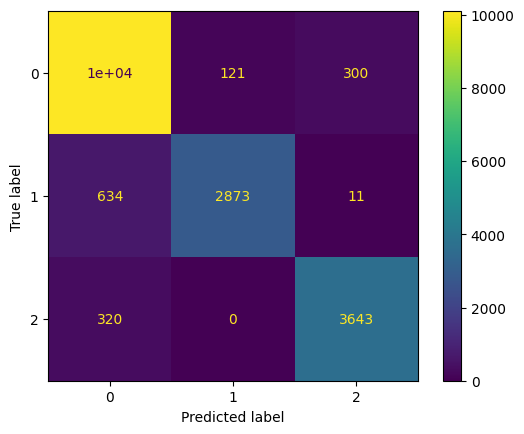

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10605
           1       0.96      0.84      0.89      3393
           2       0.92      0.92      0.92      4002

    accuracy                           0.93     18000
   macro avg       0.93      0.90      0.92     18000
weighted avg       0.93      0.93      0.93     18000



DecisionTree

In [34]:
Dt = DecisionTreeClassifier()
Dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
Dt.score(x_test, y_test)

0.9621111111111111

In [36]:
y_pred = Dt.predict(x_test)

In [37]:
print(accuracy_score(y_test, y_pred))

0.9621111111111111


[[10199   291    29]
 [  320  3197     1]
 [   41     0  3922]]


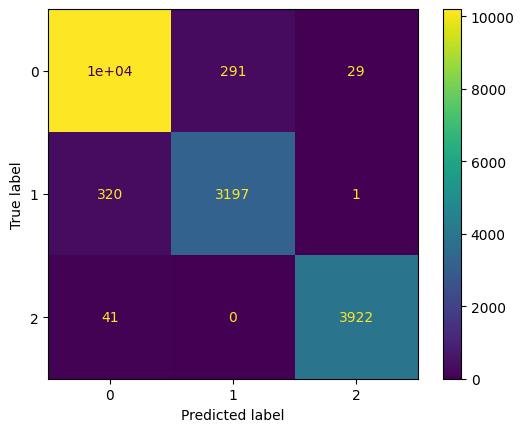

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     10519
           1       0.92      0.91      0.91      3518
           2       0.99      0.99      0.99      3963

    accuracy                           0.96     18000
   macro avg       0.96      0.96      0.96     18000
weighted avg       0.96      0.96      0.96     18000



RandomForest

In [40]:
Rf = RandomForestClassifier(n_estimators=1000)
Rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [41]:
Rf.score(x_test, y_test)

0.9765555555555555

In [43]:
y_pred=Rf.predict(x_test)

In [44]:
print(accuracy_score(y_test, y_pred))

0.9765555555555555


[[10357   110    52]
 [  256  3261     1]
 [    3     0  3960]]


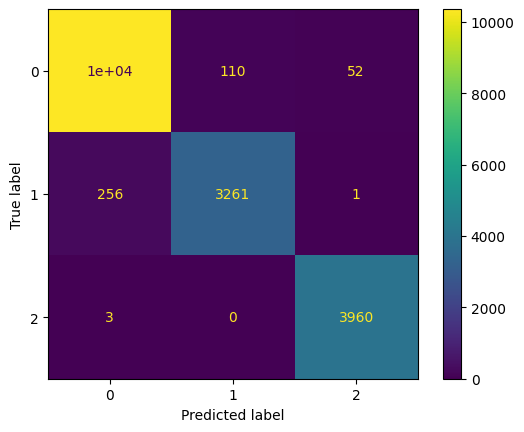

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10519
           1       0.97      0.93      0.95      3518
           2       0.99      1.00      0.99      3963

    accuracy                           0.98     18000
   macro avg       0.98      0.97      0.97     18000
weighted avg       0.98      0.98      0.98     18000



XGBoost

In [47]:
xg = xgb.XGBClassifier(objective="multi:softmax",random_state=42,n_estimators=1000, learning_rate=0.001, max_depth=7)
xg.fit(x_train, y_train,early_stopping_rounds=100, eval_set=[(x_test, y_test)])

[0]	validation_0-mlogloss:1.09722
[1]	validation_0-mlogloss:1.09582
[2]	validation_0-mlogloss:1.09443
[3]	validation_0-mlogloss:1.09304
[4]	validation_0-mlogloss:1.09166
[5]	validation_0-mlogloss:1.09027
[6]	validation_0-mlogloss:1.08889
[7]	validation_0-mlogloss:1.08751
[8]	validation_0-mlogloss:1.08614
[9]	validation_0-mlogloss:1.08476
[10]	validation_0-mlogloss:1.08339
[11]	validation_0-mlogloss:1.08203
[12]	validation_0-mlogloss:1.08066
[13]	validation_0-mlogloss:1.07930
[14]	validation_0-mlogloss:1.07794
[15]	validation_0-mlogloss:1.07658
[16]	validation_0-mlogloss:1.07522
[17]	validation_0-mlogloss:1.07387
[18]	validation_0-mlogloss:1.07252
[19]	validation_0-mlogloss:1.07117
[20]	validation_0-mlogloss:1.06982
[21]	validation_0-mlogloss:1.06848
[22]	validation_0-mlogloss:1.06714
[23]	validation_0-mlogloss:1.06580
[24]	validation_0-mlogloss:1.06446
[25]	validation_0-mlogloss:1.06313
[26]	validation_0-mlogloss:1.06179
[27]	validation_0-mlogloss:1.06046
[28]	validation_0-mlogloss:1.0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [48]:
xg.score(x_train, y_train)

0.9787219266934263

In [49]:
ypred = xg.predict(x_test)

In [50]:
print(accuracy_score(y_test, y_pred))

0.9765555555555555


[[10372   120    27]
 [  295  3221     2]
 [   31     0  3932]]


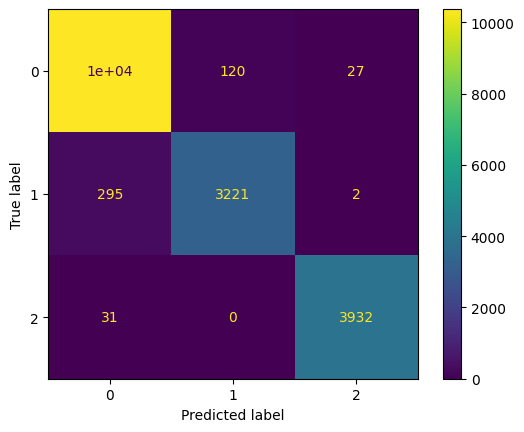

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, ypred)
print(confusion_matrix(y_test, ypred))

Light-Gradient Boosting

In [52]:
lgbm = LGBMClassifier(n_estimators=1000, learning_rate=0.01, random_state=42)
lgbm.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3547
[LightGBM] [Info] Number of data points in the train set: 71999, number of used features: 15
[LightGBM] [Info] Start training from score -0.525080
[LightGBM] [Info] Start training from score -1.659548
[LightGBM] [Info] Start training from score -1.522037


LGBMClassifier(learning_rate=0.01, n_estimators=1000, random_state=42)

In [53]:
print(lgbm.score(x_train, y_train))

0.9859442492256837


In [54]:
y_pred = lgbm.predict(x_test)

In [55]:
print(accuracy_score(y_test, y_pred))

0.9774444444444444


[[10375   123    21]
 [  250  3266     2]
 [   10     0  3953]]


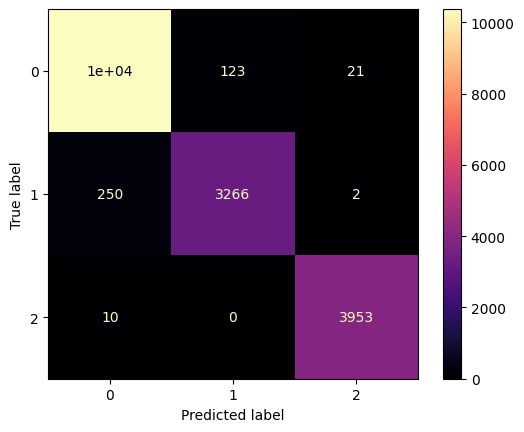

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="magma")
print(confusion_matrix(y_test, y_pred))

VotingClassifier

In [57]:
estimator = []
estimator.append(('LR', LogisticRegression()))
estimator.append(('SVC', SVC(gamma ='auto', C=5)))
estimator.append(('DTC', DecisionTreeClassifier()))

vot = VotingClassifier(estimators=estimator, voting='hard')
vot.fit(x_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('SVC', SVC(C=5, gamma='auto')),
                             ('DTC', DecisionTreeClassifier())])

In [58]:
print(vot.score(x_train, y_train))

0.9447631217100237


In [59]:
print(vot.score(x_test, y_test))

0.9403333333333334


TPOTClassifier

In [60]:
tpot = TPOTClassifier(generations=10, verbosity=2)
tpot.fit(x_train, y_train)

Optimization Progress:   1%|          | 12/1100 [01:35<4:05:20, 13.53s/pipeline]

In [ ]:
print(tpot.score(x_train, y_train))

In [ ]:
yred=tpot.predict(x_test)

In [ ]:
print(tpot.score(x_test, y_test))  

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="magma")
print(confusion_matrix(y_test, y_pred))

LazyClassifier Results

In [ ]:
clf = LazyClassifier()
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

In [ ]:
print(models)